## Economy Population

자료 : 월별 경제활동 인구(99.06 ~ 22.11)


c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


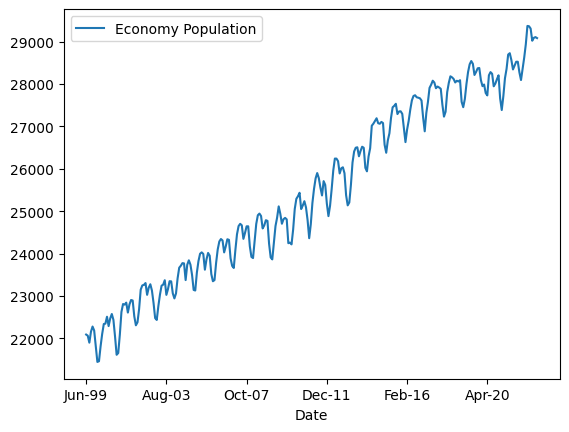

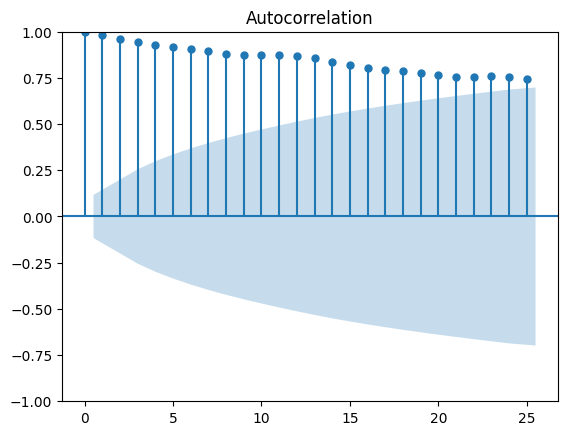

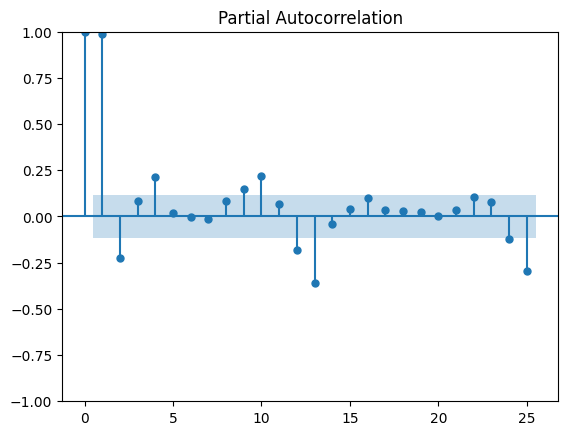

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

series = pd.read_csv('./ecopop.csv',
                     header=0, index_col=0)  # 282개


series.plot()
plot_acf(series)
plot_pacf(series)

plt.show()

#### 원본 그래프
* 우상향 하는 추세를 보이고 있음
* 강한 계절성을 보임

#### ACF
* 천천히 우하향하는 모습을 보임


#### PACF
* 1시점 이후에 급격히 감소함

<br>
➡️따라서 AR(1)모델이 적함함

<AxesSubplot:xlabel='Date'>

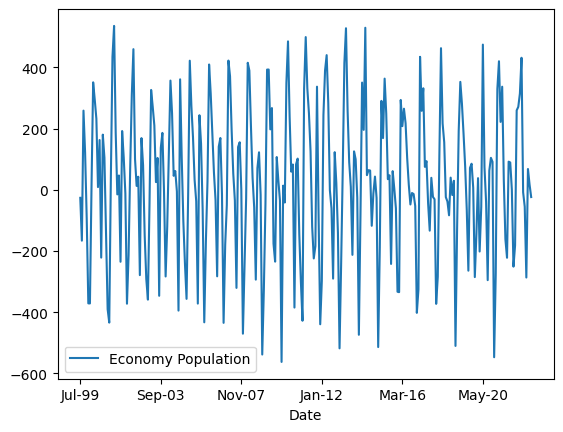

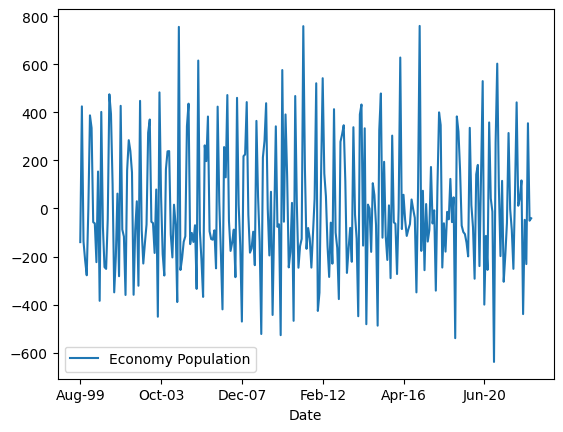

In [48]:
series_diff1 = series.diff().dropna()
series_diff2 = series.diff().diff().dropna()

series_diff1.plot()
series_diff2.plot()

In [49]:
from pmdarima import auto_arima


opt = auto_arima(series[:250], seasonal=False, trace=True, information_criterion='bic')
print(opt.summary())

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=3456.666, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=3423.080, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=3412.183, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=3453.319, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=3416.610, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : BIC=3414.018, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0]             : BIC=3407.713, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=3411.951, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : BIC=3409.115, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=3418.246, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : BIC=3402.542, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0]             : BIC=inf, Time=0.77 sec
 ARIMA(1,1,3)(0,0,0)[0]             : BIC=3385.6

In [50]:
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA(series, order=(2, 1, 1))
model_fit2 = model2.fit()
print('\n\nModel2 Summary')
print(model_fit2.summary())

model1 = ARIMA(series, order=(1, 1, 0))
model_fit1 = model1.fit()
print('Model1 Summary')
print(model_fit1.summary())



c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)




Model2 Summary
                               SARIMAX Results                                
Dep. Variable:     Economy Population   No. Observations:                  282
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1893.396
Date:                Mon, 02 Jan 2023   AIC                           3794.793
Time:                        14:04:16   BIC                           3809.346
Sample:                             0   HQIC                          3800.629
                                - 282                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1121      0.062     17.991      0.000       0.991       1.233
ar.L2         -0.5257      0.044    -12.059      0.000      -0.611      -0.440
ma.L1         -0.7667      0.076   

c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


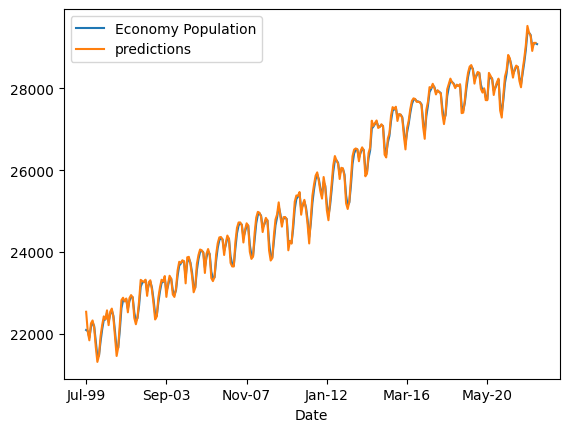

In [51]:
series.plot()
model_fit1.predict(start=1).plot(label="predictions")
plt.legend()
plt.show()

### 250개 학습, 32개 예측

c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


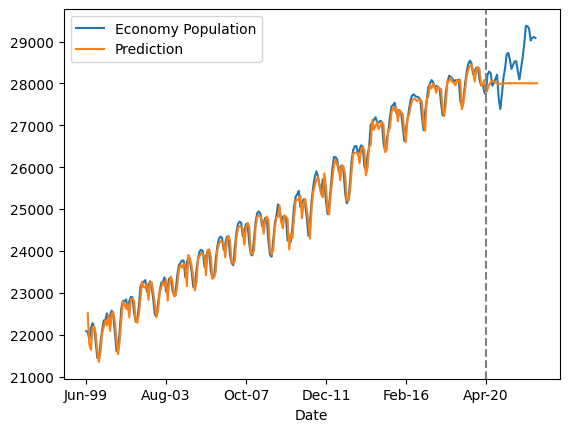

In [52]:
model  = ARIMA(series[:250], order = (2,1,1))
model_fit = model.fit()

series.plot()
model_fit.predict(start = 1, end=282).plot(label = "Prediction")
plt.axvline(x=250, color='gray', linestyle='--')
plt.legend()
plt.show()

### 200개 학습, 82개 예측

c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


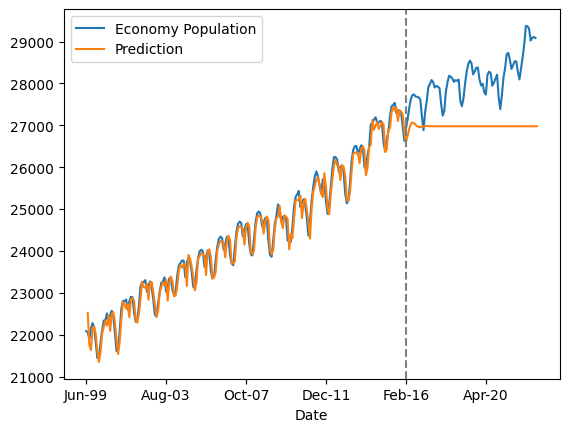

In [53]:
model = ARIMA(series[:200], order=(2, 1, 1))
model_fit = model.fit()

series.plot()
model_fit.predict(start = 1 , end=282).plot(label="Prediction")
plt.axvline(x=200, color='gray', linestyle='--')
plt.legend()
plt.show()


c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


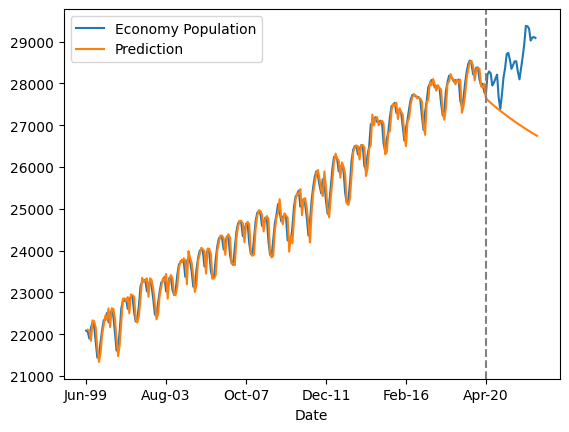

In [54]:
model = ARIMA(series[:250], order=(2, 0, 1))
model_fit = model.fit()

series.plot()
model_fit.predict(start = 1, end=282).plot(label="Prediction")
plt.axvline(x=250, color='gray', linestyle='--')
plt.legend()
plt.show()


c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


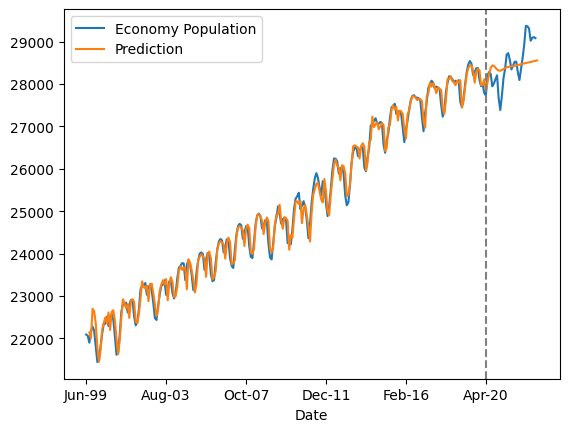

                               SARIMAX Results                                
Dep. Variable:     Economy Population   No. Observations:                  250
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1660.622
Date:                Mon, 02 Jan 2023   AIC                           3331.243
Time:                        14:04:19   BIC                           3348.810
Sample:                             0   HQIC                          3338.315
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2326      0.051     24.155      0.000       1.133       1.333
ar.L2         -0.5904      0.049    -12.035      0.000      -0.687      -0.494
ma.L1         -1.9898      0.360     -5.526      0.0

In [55]:
model = ARIMA(series[:250], order=(2, 2, 2))
model_fit = model.fit()

series.plot()
model_fit.predict(start=2, end=282).plot(label="Prediction")
plt.axvline(x=250, color='gray', linestyle='--')
plt.legend()
plt.show()

print(model_fit.summary())


In [56]:
opt = auto_arima(series[:250], seasonal=True,m=12, trace=True,information_criterion='bic')
print(opt.summary())

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : BIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : BIC=3456.666, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : BIC=3121.149, Time=0.69 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : BIC=3298.763, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : BIC=3453.319, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : BIC=3423.080, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : BIC=inf, Time=2.17 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : BIC=3067.094, Time=1.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : BIC=3301.103, Time=0.39 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : BIC=3072.584, Time=2.89 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : BIC=3072.575, Time=2.90 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : BIC=3242.706, Time=1.10 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : BIC=inf, Time=3.50 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : BIC=3066.310, Time=0.79 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept

c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sop36\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


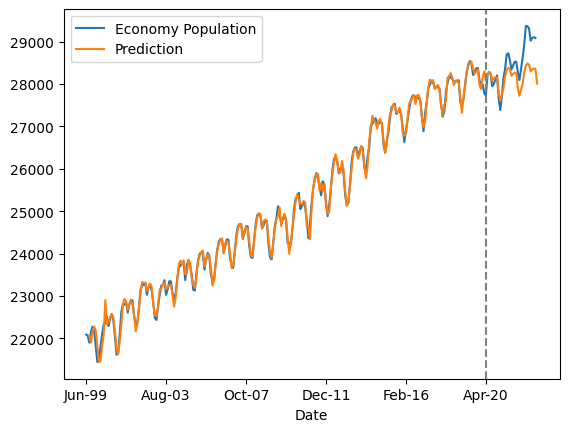

                                     SARIMAX Results                                      
Dep. Variable:                 Economy Population   No. Observations:                  250
Model:             ARIMA(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1522.216
Date:                            Mon, 02 Jan 2023   AIC                           3050.433
Time:                                    14:07:28   BIC                           3060.985
Sample:                                         0   HQIC                          3054.680
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9782      0.007    130.482      0.000       0.963       0.993
ma.S.L12      -0.6603      0.054   

In [58]:
model_s = ARIMA(series[:250], order=(0, 1, 0), seasonal_order=(1,0,1,12))
model_s_fit = model_s.fit()

series.plot()
model_s_fit.predict(start=2, end=282).plot(label="Prediction")
plt.axvline(x=250, color='gray', linestyle='--')
plt.legend()
plt.show()
print(model_s_fit.summary())
